### Load libraries

In [2]:
#Import libraries
import pandas as pd 
import numpy as np
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Load 'Fertility' dataset

In [3]:
#Load Iris dataset
fileURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt" 
dfFert = pd.read_csv(fileURL, names=["Season of analysis", "Age", "Childish diseases", "Accident/trauma",
                                          "Surgical intervention","High fever in last year", "Freq of alcohol consumption",
                                          "Smoking habit","No of hrs sitting per day", "Diagnosis"], header=None)

#### Column names

Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

Age at the time of analysis. 18-36 (0, 1) 

Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1) 

Accident or serious trauma 1) yes, 2) no. (0, 1) 

Surgical intervention 1) yes, 2) no. (0, 1) 

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1) 

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

Number of hours spent sitting per day ene-16 (0, 1) 

Output: Diagnosis normal (N), altered (O) 

#### Convert class values to binary

In [4]:
for i in range(0, len(dfFert)):
    if(dfFert['Diagnosis'][i]=='N'):
        dfFert.loc[i, 'Diagnosis'] = '1'
    elif(dfFert['Diagnosis'][i]=='O'):
        dfFert.loc[i, 'Diagnosis'] = '0'

In [5]:
dfFert.head()

,Season of analysis,Age,Childish diseases,Accident/trauma,Surgical intervention,High fever in last year,Freq of alcohol consumption,Smoking habit,No of hrs sitting per day,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0


### Splitting data into traina nd test & Model fitting 

In [6]:
from sklearn.model_selection import train_test_split
x = dfFert.values[:,0:9]
y = dfFert.values[:,9:10]
seed(1)
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3)

#Model fitting
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [7]:
#Train accuracy
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train)
accuracy_score(y_train,y_train_pred)*100

98.571428571428584

### 1. Accuracy of model on Test data

In [8]:
#Test accuracy
y_test_pred = clf.predict(X_validation)
accuracy_score(y_validation,y_test_pred)*100

80.0

##### Accuracy is a global evaluation metric which denotes the rate of correct predictions. The test data has been predicted with an accuracy of 80%. This shows that 80% of the predictions has matched the true values of the instances in our test set, while 20% of the test set was predicted incorrectly. It might be true that accuracy is high because the number of instances in both the classes are not balanced.

### 2. Precision and Recall values

In [9]:
#Precision value
from sklearn.metrics import precision_score
precision = precision_score(y_validation,y_test_pred, average='weighted')
precision

0.75714285714285723

In [10]:
#Recall value
from sklearn.metrics import recall_score
recall = recall_score(y_validation,y_test_pred, average='weighted') 
recall

0.80000000000000004

##### Precision = tp/(tp+fp). This shows how often we are correct when we say that an instance belongs to the positive class. High precision relates to the low false positive rate. We have got 0.757 precision which is pretty good.
##### Conversely, Recall = tp/(tp+fn). This shows the percentage of true positive instances that we are infact labelling as being positive. We have got recall of 0.8 which is good for this model as it’s above 0.5.

### 3. Classification Report

In [11]:
#Classification report
from sklearn.metrics import classification_report

#target_names = ['Diagnosis Normal', 'Diagnosis altered']
print(classification_report(y_validation,y_test_pred))


             precision    recall  f1-score   support

          0       0.50      0.17      0.25         6
          1       0.82      0.96      0.88        24

avg / total       0.76      0.80      0.76        30



##### The precision and recall values for each class is shown. Also the f1-scores corresponding to every class shows the accuracy of the classifier in classifying the data points in that particular class compared to all other classes. The support is the number of samples of the true response that lie in that class. The last line gives a weighted average of precision, recall and f1-score where the weights are the support values. If f1-score is high, it shows that the number of false positives and false negatives are low. Here, f1-score is not too high for class 0.

### 4. Confusion Matrix

In [12]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_validation,y_test_pred)


array([[ 1,  5],
       [ 1, 23]], dtype=int64)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_validation,y_test_pred).ravel()
tn, fp, fn, tp

(1, 5, 1, 23)

##### Confusion matrix gives a visual representation of the results where the upper left quadrant denotes the true negative (tn) samples, upper right quadrant give the false positive (fp) samples, lower left gives false negative (fn), lower right quadrant denotes the true positive (tp) samples.
##### There are 6 samples in the test set belonging to the negative class out of which 1 sample is predicted right, while the other 5 are predicted as positive. 
##### There are 24 samples in the test set belonging to the positive class out of which 23 samples are predicted correctly, while the remaining one sample was predicted incorrectly.

In [14]:
#Convert y_validation and predictions from char to int values
y_val = [[int(i) for i in l] for l in y_validation]
y_val_pred = [[int(i) for i in l] for l in y_test_pred]

### 4. Plot ROC curve

In [15]:
#Compute ROC metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

predictions = clf.predict_proba(X_validation)

print ("auc_score is: ",roc_auc_score(y_val, y_val_pred))

fpr, tpr, thresholds = roc_curve(y_val, predictions[:,1])
print("fpr is: ",fpr)
print("tpr is: ",tpr)

auc_score is:  0.5625
fpr is:  [ 0.          0.83333333  1.        ]
tpr is:  [ 0.          0.95833333  1.        ]


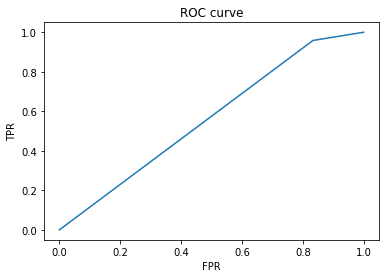

In [16]:
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

##### The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate(TPR) on the y-axis and the False Positive Rate(FPR) on the x-axis. The closer the model is to the top-left corner, the more accurate it is. Since this model lies slightly on the left of the diagonal, this is because the tpr is quite high (about 96%) while the fpr is not too low (about 83.33%).

### 5. Precision-Recall curve

Text(0.5,1,'2-class Precision-Recall curve: AP=0.82')

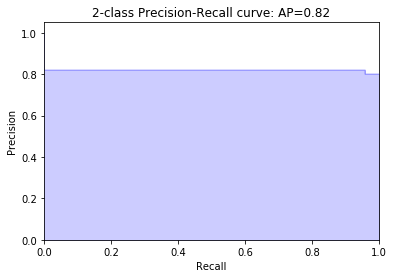

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

average_precision = average_precision_score(y_val, predictions[:,1])

precision, recall, _ = precision_recall_curve(y_val, predictions[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

##### The Precision-Recall curve plots Precision on the y-axis and Recall in the x-axis. The ideal model would represent a curve where Precision value of 1 and Recall value of 1 as well. The precision-recall curve typically starts out relatively high, and descends though not monotonically. Here we can see that the precision drops by about 0.03 at a Recall value of nearly 0.97. This low precision can be a result of the imbalanced dataset.